In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import Imputer

%matplotlib inline

In [41]:
pd.set_option('display.max_columns', 100)

mpl.rc(group='figure', figsize=(10,8))
plt.style.use('seaborn')

In [42]:
x_train = pd.read_csv('datasets/Training_Data_Features.csv')
x_train.week_start_date = pd.to_datetime(x_train.week_start_date)

y_train = pd.read_csv('datasets/Training_Data_Labels.csv', 
                      usecols=['total_cases'])

x_test = pd.read_csv('datasets/dengue_features_test.csv')
x_test.week_start_date = pd.to_datetime(x_test.week_start_date)

In [43]:
x_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [44]:
y_train.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [45]:
xy_train = pd.concat([y_train, x_train], axis=1)  # concatanate training data and labels
xy_train.head()

,total_cases,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,4,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,5,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,4,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,6,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [46]:
#split the dataset into two according to the city
xy_sj = xy_train.loc[xy_train.city == 'sj', :]
xy_iq = xy_train.loc[xy_train.city == 'iq', :]

In [47]:
#calculate the correlation between each attribut with total_cases
xy_sj.corr().total_cases.sort_values(ascending=False) 
xy_iq.corr().total_cases.sort_values(ascending=False)

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.236476
reanalysis_dew_point_temp_k              0.230401
reanalysis_min_air_temp_k                0.214514
station_min_temp_c                       0.211702
year                                     0.179451
reanalysis_relative_humidity_percent     0.130083
station_avg_temp_c                       0.113070
reanalysis_precip_amt_kg_per_m2          0.101171
reanalysis_air_temp_k                    0.097098
precipitation_amt_mm                     0.090171
reanalysis_sat_precip_amt_mm             0.090171
reanalysis_avg_temp_k                    0.079872
station_max_temp_c                       0.075279
station_precip_mm                        0.042976
ndvi_sw                                  0.032999
ndvi_ne                                  0.020215
ndvi_nw                                 -0.009586
weekofyear                              -0.011850
ndvi_se                                 -0.041067


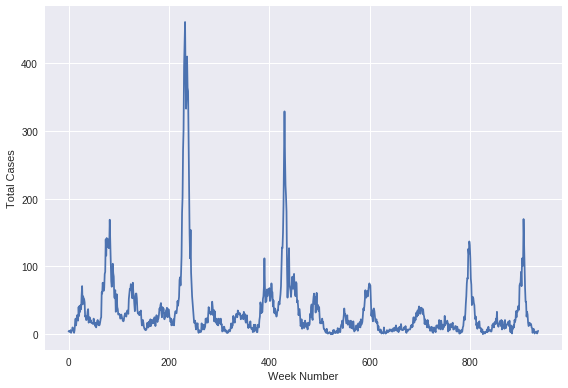

In [48]:
xy_sj.total_cases.plot(kind='line')
plt.xlabel('Week Number')
plt.ylabel('Total Cases')
plt.tight_layout()

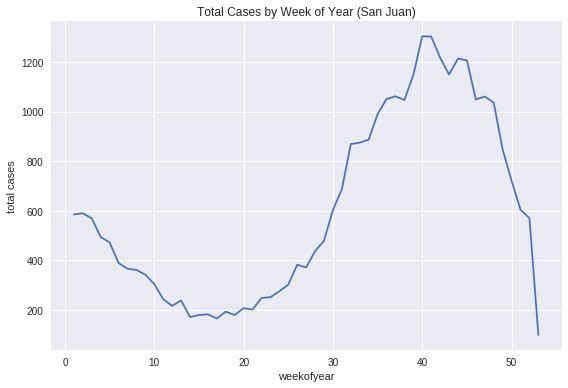

In [49]:
xy_sj.groupby(['weekofyear']).total_cases.sum().plot(kind='line')
plt.ylabel('total cases')
plt.title('Total Cases by Week of Year (San Juan)')
plt.tight_layout()

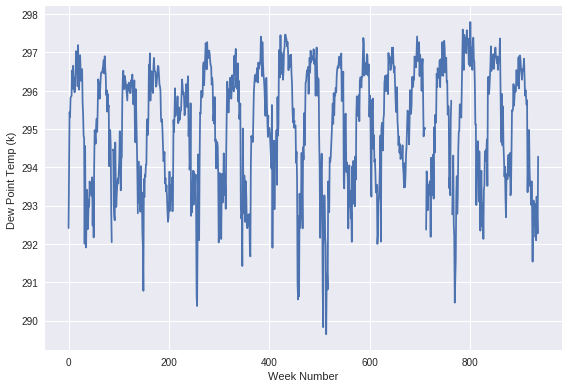

In [50]:
xy_sj.reanalysis_dew_point_temp_k.plot(kind='line')
plt.xlabel('Week Number')
plt.ylabel('Dew Point Temp (k) ')
plt.tight_layout()

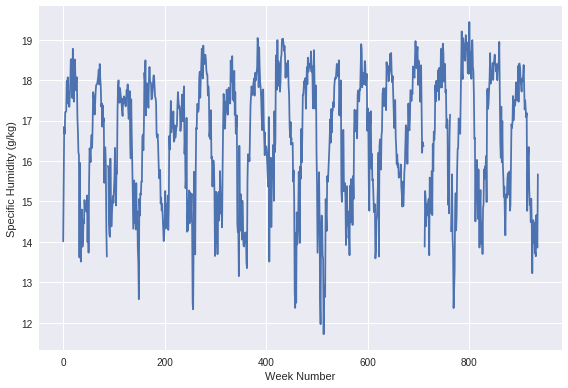

In [51]:
xy_sj.reanalysis_specific_humidity_g_per_kg.plot(kind='line')
plt.xlabel('Week Number')
plt.ylabel('Specific Humidity (g/kg)')
plt.tight_layout()

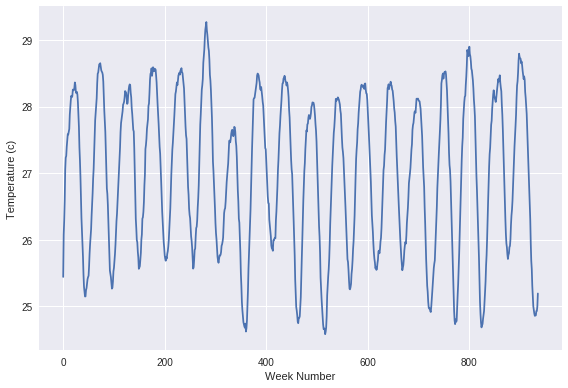

In [52]:
xy_sj.station_avg_temp_c.rolling(window=13, min_periods=1).mean().plot(kind='line')
plt.xlabel('Week Number')
plt.ylabel('Temperature (c)')
plt.tight_layout()


In [53]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [54]:
x_train = x_train.reset_index()
x_test = x_test.reset_index()

x_train_sj = x_train.loc[x_train.city == 'sj', :].copy()
x_train_iq = x_train.loc[x_train.city == 'iq', :].copy()

y_train_sj = y_train.loc[x_train.city == 'sj', :].copy()
y_train_iq = y_train.loc[x_train.city == 'iq', :].copy()

x_test_sj = x_test.loc[x_test.city == 'sj', :].copy()
x_test_iq = x_test.loc[x_test.city == 'iq', :].copy()

In [55]:
keys = ['city', 'year', 'weekofyear']

features = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

selected_features = ['reanalysis_dew_point_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_specific_humidity_g_per_kg', 
            'station_avg_temp_c',  'station_max_temp_c', 'station_min_temp_c']

new_features = ['recent_mean_dew_point', 'recent_mean_spec_humid', 'recent_sum_precip']

time_series_features = ['week_start_date']

drop_features = list(set(features) - set(selected_features) - set(keys) - set(time_series_features))
print drop_features

['ndvi_ne', 'reanalysis_sat_precip_amt_mm', 'ndvi_se', 'reanalysis_relative_humidity_percent', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'ndvi_sw', 'ndvi_nw', 'reanalysis_tdtr_k', 'station_precip_mm', 'reanalysis_air_temp_k', 'precipitation_amt_mm', 'reanalysis_avg_temp_k', 'station_diur_temp_rng_c']


## impute missing values using redundent features

In [56]:
impute_columns = ['reanalysis_avg_temp_c', 'reanalysis_max_air_temp_c', 
                  'reanalysis_min_air_temp_c']

def impute_redundant_features(df):
    df['reanalysis_avg_temp_c'] = df.reanalysis_avg_temp_k - 273.15
    df.reanalysis_avg_temp_c -= (df.reanalysis_avg_temp_c - df.station_avg_temp_c).mean()
    df.loc[df.station_avg_temp_c.isnull(), 'station_avg_temp_c'] = df.reanalysis_avg_temp_c

    df['reanalysis_max_air_temp_c'] = df.reanalysis_max_air_temp_k - 273.15
    df.reanalysis_max_air_temp_c -= (df.reanalysis_max_air_temp_c - df.station_max_temp_c).mean()
    df.loc[df.station_max_temp_c.isnull(), 'station_max_temp_c'] = df.reanalysis_max_air_temp_c

    df['reanalysis_min_air_temp_c'] = df.reanalysis_min_air_temp_k - 273.15
    df.reanalysis_min_air_temp_c -= (df.reanalysis_min_air_temp_c - df.station_min_temp_c).mean()
    df.loc[df.station_min_temp_c.isnull(), 'station_min_temp_c'] = df.reanalysis_min_air_temp_c
    
    df.drop(impute_columns, axis=1, inplace=True) # drop temperary columns used to impute missing features
    
    return df

In [57]:
x_train_sj = impute_redundant_features(x_train_sj)
x_train_iq = impute_redundant_features(x_train_iq)

x_test_sj = impute_redundant_features(x_test_sj)
x_test_iq = impute_redundant_features(x_test_iq)

In [58]:
#impute other missing values 
def impute_missing_values(df, imputer): 
    imputer.fit(df[selected_features])
    df[selected_features] = imputer.transform(df[selected_features])
    return df

In [59]:
imputer_sj = Imputer(strategy='mean')
x_train_sj = impute_missing_values(x_train_sj, imputer_sj)
x_test_sj = impute_missing_values(x_test_sj, imputer_sj)

imputer_iq = Imputer(strategy='mean')
x_train_iq = impute_missing_values(x_train_iq, imputer_iq)
x_test_iq = impute_missing_values(x_test_iq, imputer_iq)

## adding new features using time series data

In [60]:
def add_time_series_features(df, window):
    df.set_index('week_start_date', inplace=True)
    #use time series data for dew point, humidity, and precipitation.
    roll_df = df.rolling(window=window, min_periods=1)
    df['recent_mean_dew_point'] = roll_df.reanalysis_dew_point_temp_k.mean()
    df['recent_mean_spec_humid'] = roll_df.reanalysis_specific_humidity_g_per_kg.mean()
    df['recent_sum_precip'] = roll_df.reanalysis_precip_amt_kg_per_m2.sum()
    df.reset_index(inplace=True)    
    return df

In [61]:
# adding time series data using a rolling window for sj and iq data
x_train_sj = add_time_series_features(x_train_sj, window=100)
x_train_iq = add_time_series_features(x_train_iq, window=30)
x_test_sj = add_time_series_features(x_test_sj, window=100)
x_test_iq = add_time_series_features(x_test_iq, window=30)

In [62]:
def drop_unwanted_features(df):
    df.drop(drop_features, axis=1, inplace=True)
    df.drop(time_series_features, axis=1, inplace=True)
    return df

x_train_sj = drop_unwanted_features(x_train_sj)
x_train_iq = drop_unwanted_features(x_train_iq)
x_test_sj = drop_unwanted_features(x_test_sj)
x_test_iq = drop_unwanted_features(x_test_iq)

x_train_sj.head()

,index,city,year,weekofyear,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,recent_mean_dew_point,recent_mean_spec_humid,recent_sum_precip
0,0,sj,1990,18,292.414286,32.00,14.012857,25.442857,29.4,20.0,292.414286,14.012857,32.00
1,1,sj,1990,19,293.951429,17.94,15.372857,26.714286,31.7,22.2,293.182857,14.692857,49.94
2,2,sj,1990,20,295.434286,26.10,16.848571,26.714286,32.2,22.8,293.933333,15.411429,76.04
3,3,sj,1990,21,295.310000,13.90,16.672857,27.471429,33.3,23.3,294.277500,15.726786,89.94
4,4,sj,1990,22,295.821429,12.20,17.210000,28.942857,35.0,23.9,294.586286,16.023429,102.14


## normalize feature values

In [63]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_to_normalize = selected_features + new_features

x_train_sj[features_to_normalize] = x_train_sj[features_to_normalize].apply(normalize, axis=0)
x_train_iq[features_to_normalize] = x_train_iq[features_to_normalize].apply(normalize, axis=0)
x_test_sj[features_to_normalize] = x_test_sj[features_to_normalize].apply(normalize, axis=0)
x_test_iq[features_to_normalize] = x_test_iq[features_to_normalize].apply(normalize, axis=0)

In [64]:
x_train = pd.concat([x_train_sj, x_train_iq], axis=0)
x_train.set_index('index', inplace=True)
# x_train.head()
x_sj, y_sj = x_train.loc[x_train.city == 'sj', :], y_train.loc[x_train.city == 'sj', :]
x_iq, y_iq = x_train.loc[x_train.city == 'iq', :], y_train.loc[x_train.city == 'iq', :]


#split the dataset into two for cross validation
x_train_sj, x_cross_sj, y_train_sj, y_cross_sj = train_test_split(x_sj, y_sj,test_size=0.2,stratify=x_sj.weekofyear)
x_train_iq, x_cross_iq, y_train_iq, y_cross_iq = train_test_split(x_iq,y_iq,test_size=0.2,stratify=x_iq.weekofyear)

In [65]:
def drop_unnecessary_columns(df):
    return df[selected_features + new_features + ['weekofyear']]

x_train_sj = drop_unnecessary_columns(x_train_sj)
x_train_iq = drop_unnecessary_columns(x_train_iq)
x_cross_sj = drop_unnecessary_columns(x_cross_sj)
x_cross_iq = drop_unnecessary_columns(x_cross_iq)

In [66]:
def train_predict_score(reg, X, y):
    reg.fit(X, y)
    y_pred = reg.predict(X)
    return mean_absolute_error(y_true=y, y_pred=y_pred)

reg = DummyRegressor(strategy='mean')
print round(train_predict_score(reg, x_train_sj, y_train_sj), 4)
print round(train_predict_score(reg, x_train_iq, y_train_iq), 4)

25.9956
7.2177


In [67]:
def train_cross_value_score(reg, x, y, scoring='neg_mean_absolute_error'):
    reg.fit(x, y)
    scores = np.abs(cross_val_score(reg, x, y, scoring=scoring))
    print("Scores: {}".format(scores))
    print("Avg Score: {}".format(scores.mean()))

In [68]:
# LinerRegression

reg = LinearRegression(n_jobs=-1)
print('San Juan:')
print x_train_sj

train_cross_value_score(reg, x_train_sj, y_train_sj)
print('\nIquitos:')
train_cross_value_score(reg, x_train_iq, y_train_iq)

San Juan:
       reanalysis_dew_point_temp_k  reanalysis_precip_amt_kg_per_m2  \
index                                                                 
54                       -0.313725                         0.138104   
652                       0.215748                        -0.643850   
646                       1.290213                        -0.294688   
230                       0.454924                         0.414900   
73                        0.946056                         1.324412   
338                       0.390109                         0.978065   
211                       0.175581                        -0.044079   
136                      -0.293642                        -0.316370   
691                       1.009958                        -0.038448   
228                       0.509697                         1.124488   
165                       0.894934                        -0.083501   
604                       0.414757                         0.093333

In [69]:
#KNeighborsRegression

reg = KNeighborsRegressor(n_jobs=-1)
print('San Juan:')
train_cross_value_score(reg, x_train_sj, y_train_sj)
print('\nIquitos:')
train_cross_value_score(reg, x_train_iq, y_train_iq)

San Juan:
Scores: [25.5216     24.39518072 23.10200803]
Avg Score: 24.3395962517

Iquitos:
Scores: [6.58273381 7.28776978 7.23768116]
Avg Score: 7.03606158551


In [70]:
#SVM (Support Vector Regression)
reg = SVR(kernel='linear')
print('San Juan:')
train_cross_value_score(reg, x_train_sj, y_train_sj.total_cases)
print('\nIquitos:')
train_cross_value_score(reg, x_train_iq, y_train_iq.total_cases)

reg = SVR(kernel='rbf')
print('\nSan Juan:')
train_cross_value_score(reg, x_train_sj, y_train_sj.total_cases)
print('\nIquitos:')
train_cross_value_score(reg, x_train_iq, y_train_iq.total_cases)

San Juan:
Scores: [23.72830445 22.4039242  19.96197922]
Avg Score: 22.0314026216

Iquitos:
Scores: [5.56046541 6.68937517 6.08278881]
Avg Score: 6.11087646092

San Juan:
Scores: [22.17791491 21.17124329 19.01624462]
Avg Score: 20.788467605

Iquitos:
Scores: [5.39724625 6.55871721 5.79878418]
Avg Score: 5.91824921342


In [71]:
#Gredient Boosting Regression
reg = GradientBoostingRegressor(criterion='mae', random_state=67)
print('San Juan:')
train_cross_value_score(reg, x_train_sj, y_train_sj.total_cases)
print('\nIquitos:')
train_cross_value_score(reg, x_train_iq, y_train_iq.total_cases)

San Juan:
Scores: [20.17456035 21.47506684 16.04678513]
Avg Score: 19.23213744

Iquitos:
Scores: [5.12321161 5.80350829 5.20431366]
Avg Score: 5.37701118599


In [72]:
#Random Forest Regression
reg = RandomForestRegressor(criterion='mae', n_jobs=-1, random_state=67)
print('San Juan:')
train_cross_value_score(reg, x_train_sj, y_train_sj.total_cases)
print('\nIquitos:')
train_cross_value_score(reg, x_train_iq, y_train_iq.total_cases)

San Juan:
Scores: [18.7184     19.35100402 16.68674699]
Avg Score: 18.2520503347

Iquitos:
Scores: [6.67553957 6.71726619 6.33188406]
Avg Score: 6.57489660446


In [73]:
#Multi-layer Perceptron Regression.
reg = MLPRegressor(max_iter=3000, random_state=67)
print('San Juan:')
train_cross_value_score(reg, x_train_sj, y_train_sj.total_cases)
print('\nIquitos:')
train_cross_value_score(reg, x_train_iq, y_train_iq.total_cases)

San Juan:
Scores: [26.01487374 23.62487406 21.78418646]
Avg Score: 23.8079780882

Iquitos:
Scores: [6.48563614 7.23112647 7.8556758 ]
Avg Score: 7.19081280354


In [74]:
#grid serch to find optimal hyper-parameters
def grid_search(reg, X, y, param_grid, scoring='neg_mean_absolute_error'):
    grid = GridSearchCV(reg, param_grid=param_grid, scoring=scoring)
    grid.fit(X, y)
    print("Best score: {}".format(np.abs(grid.best_score_)))
    print("Best params: {}".format(grid.best_params_))

In [75]:
reg = GradientBoostingRegressor(random_state=67)

param_grid = [
    {'learning_rate': [0.1, 0.3, 1.0, 3.0], 'n_estimators': [10, 30, 100, 300, 500], 
     'max_depth': [3, 5, 7, 9]}
]

grid_search(reg, x_train_sj, y_train_sj.total_cases, param_grid)
grid_search(reg, x_train_iq, y_train_iq.total_cases, param_grid)

Best score: 16.4240604925
Best params: {'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 7}
Best score: 5.66193021249
Best params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}


In [76]:
reg = RandomForestRegressor(random_state=67)

param_grid = [
    {
      'n_estimators': [10, 30, 100, 300, 500], 
      'max_depth': [3, 5, 7, None]
    } 
]

grid_search(reg, x_train_sj, y_train_sj.total_cases, param_grid)
grid_search(reg, x_train_iq, y_train_iq.total_cases, param_grid)

Best score: 16.7267139037
Best params: {'n_estimators': 500, 'max_depth': None}
Best score: 6.22997596154
Best params: {'n_estimators': 300, 'max_depth': None}


In [77]:
def cross_validate(reg, x_train, y_train, x_cross, y_cross):
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_cross)
    return mean_absolute_error(y_true=y_cross, y_pred=y_pred)

In [78]:
reg_sj = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=500, random_state=67)
cross_validate(reg_sj, x_train_sj, y_train_sj.total_cases, x_cross_sj, y_cross_sj.total_cases)

14.59470799784944

In [79]:
reg_iq = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=500, random_state=67)
cross_validate(reg_iq, x_train_iq, y_train_iq.total_cases, x_cross_iq, y_cross_iq.total_cases)

4.531562748853787

In [80]:
reg_sj = RandomForestRegressor(max_depth=None, n_estimators=500, random_state=67)
cross_validate(reg_sj, x_train_sj, y_train_sj.total_cases, x_cross_sj, y_cross_sj.total_cases)

17.46613829787234

In [81]:
reg_iq = RandomForestRegressor(max_depth=None, n_estimators=500, random_state=67)
cross_validate(reg_iq, x_train_iq, y_train_iq.total_cases, x_cross_iq, y_cross_iq.total_cases)

4.589346153846154

In [82]:
predict_sj_gbr = x_test_sj[keys].copy()
predict_iq_gbr = x_test_iq[keys].copy()

predict_sj_rnf = x_test_sj[keys].copy()
predict_iq_rnf = x_test_iq[keys].copy()

In [83]:
x_sj = drop_unnecessary_columns(x_sj)
x_iq = drop_unnecessary_columns(x_iq)
x_test_sj = drop_unnecessary_columns(x_test_sj)
x_test_iq = drop_unnecessary_columns(x_test_iq)

In [84]:
gbr_sj = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=500, random_state=67)
gbr_sj.fit(x_sj, y_sj.total_cases)
rnf_sj = RandomForestRegressor(n_estimators=500, max_depth =  None)
rnf_sj.fit(x_sj, y_sj.total_cases)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [85]:
gbr_iq = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=500, random_state=67)
gbr_iq.fit(x_iq, y_iq.total_cases)

rnf_iq = RandomForestRegressor(n_estimators=300, max_depth = 7)
rnf_iq.fit(x_iq, y_iq.total_cases)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [92]:
y_gbr_sj_pred = gbr_sj.predict(x_test_sj)
y_rnf_sj_pred = rnf_sj.predict(x_test_sj)

predict_sj_gbr['total_cases'] = y_gbr_sj_pred.round().astype(int)
predict_sj_rnf['total_cases'] = y_rnf_sj_pred.round().astype(int)


In [87]:
y_gbr_iq_pred = gbr_iq.predict(x_test_iq)
y_rnf_iq_pred = rnf_iq.predict(x_test_iq)


predict_iq_gbr['total_cases'] = y_gbr_iq_pred.round().astype(int)
predict_iq_rnf['total_cases'] = y_rnf_iq_pred.round().astype(int)

In [88]:
predict_df_gbr = pd.concat([predict_sj_gbr, predict_iq_gbr], axis=0)
predict_df_rnf = pd.concat([predict_sj_rnf, predict_iq_rnf], axis=0)

In [89]:
predict_df_gbr[predict_df_gbr.total_cases < 0]
predict_df_rnf[predict_df_rnf.total_cases < 0]

,city,year,weekofyear,total_cases


In [90]:
predict_df_gbr.loc[predict_df_gbr.total_cases < 0, 'total_cases'] = 0
predict_df_rnf.loc[predict_df_rnf.total_cases < 0, 'total_cases'] = 0

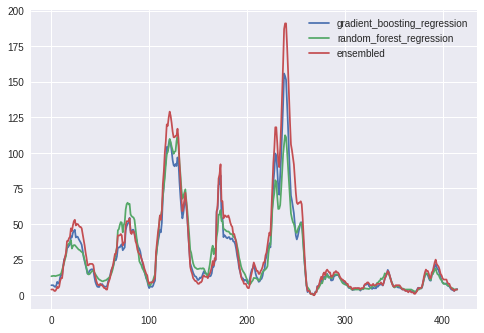

In [99]:
# submission_filename = 'dengue_submission_001.csv'
# predict_df.to_csv(submission_filename, index=False)
# predict_df_gbr.reset_index(inplace=True)
# predict_df_rnf.reset_index(inplace=True)
df_pred = pd.DataFrame()
df_pred['gradient_boosting_regression'] = predict_df_gbr.total_cases.rolling(window=5, min_periods=1,center=True).mean()
df_pred['random_forest_regression'] = predict_df_rnf.total_cases.rolling(window=5, min_periods=1,center=True).mean()
# df_pred['gradient_boosting_regression'] = predict_df_gbr.total_cases
# df_pred['random_forest_regression'] = predict_df_rnf.total_cases
df_pred['y_test'] = y_test
df_pred['y_train'] = y_train

difference = df_pred['gradient_boosting_regression'] - df_pred['random_forest_regression']

smoothed_difference = difference.rolling(window=13, min_periods=1).mean()
df_pred['difference'] = smoothed_difference
# print difference_roll
df_pred['ensembled'] = df_pred['gradient_boosting_regression']*0.8+df_pred['random_forest_regression']*0.4
df_pred['ensembled'] = df_pred['ensembled'] + df_pred['difference']
df_pred['ensembled'] =df_pred['ensembled'].astype(int)

df_pred[['gradient_boosting_regression','random_forest_regression','ensembled']].plot()

